In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

In [5]:
# -- load comma separate version of file into numpy array of dimensions (100, 504)
d = pd.read_csv("./data/test.txt", delimiter=",", header=None, skiprows=1).values

In [6]:
with open("./data/test.txt") as f:
    sizes = map(int, f.readline().strip().split(","))

In [7]:
sizes

[3, 96, 12, 12, 12, 6]

In [8]:
# -- split d into 3 segments vertically, to separate the three calo layers
first, second, third = np.split(d, indices_or_sections=[sizes[0]*sizes[1], sizes[0]*sizes[1] + sizes[2]*sizes[3]], axis=1)

In [9]:
# -- reshape to put them into unravelled, 2D image format
first = np.expand_dims(first.reshape(-1, sizes[0], sizes[1]), -1)
second = np.expand_dims(second.reshape(-1, sizes[2], sizes[3]), -1)
third = np.expand_dims(third.reshape(-1, sizes[4], sizes[5]), -1)

In [10]:
first.shape

(100, 3, 96, 1)

In [52]:
np.percentile(first[first > 0], 98)

892.12841552692225

# Check that one event makes sense

The 0th event is empty

In [11]:
imageix = 1

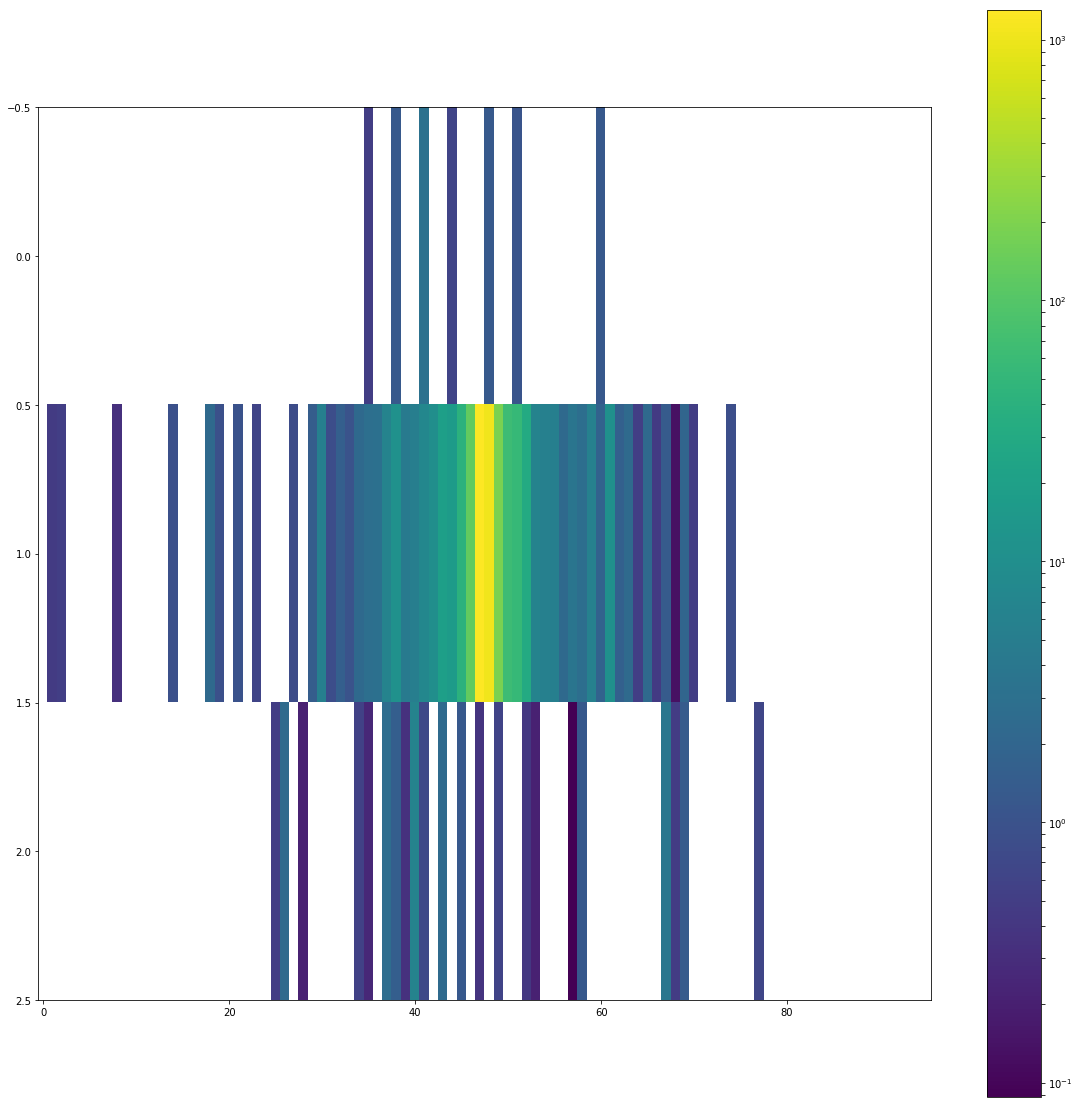

In [15]:
plt.figure(figsize=(20,20))
plt.imshow(first[imageix][:, :, 0], aspect=float(sizes[1])/sizes[0], interpolation='nearest', norm=LogNorm())
plt.colorbar()
# aspect is needed to make this 3*96 image come out nice

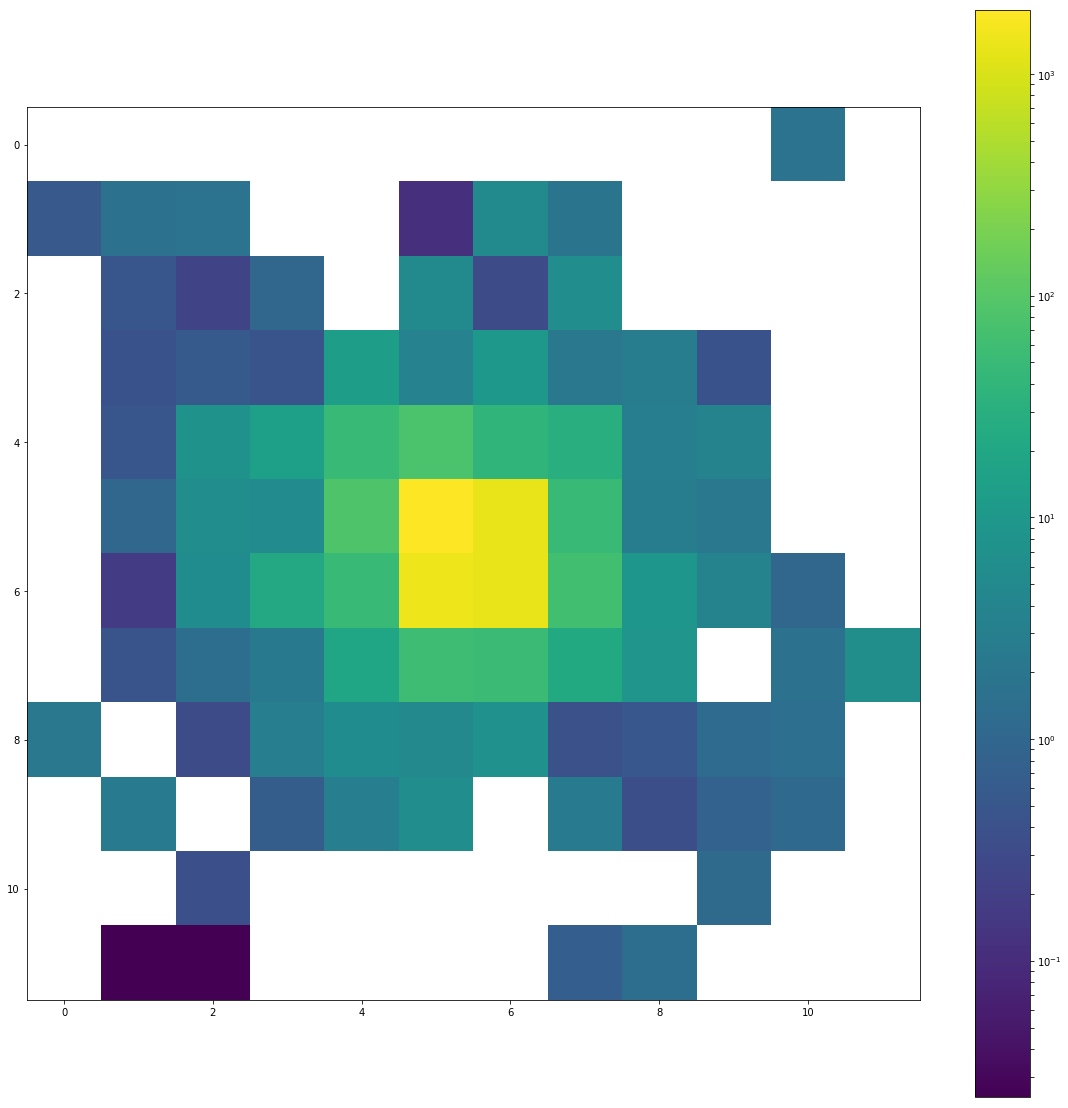

In [16]:
plt.figure(figsize=(20,20))
plt.imshow(second[imageix][:, :, 0], aspect=float(sizes[2])/sizes[3], interpolation='nearest', norm=LogNorm())
plt.colorbar()

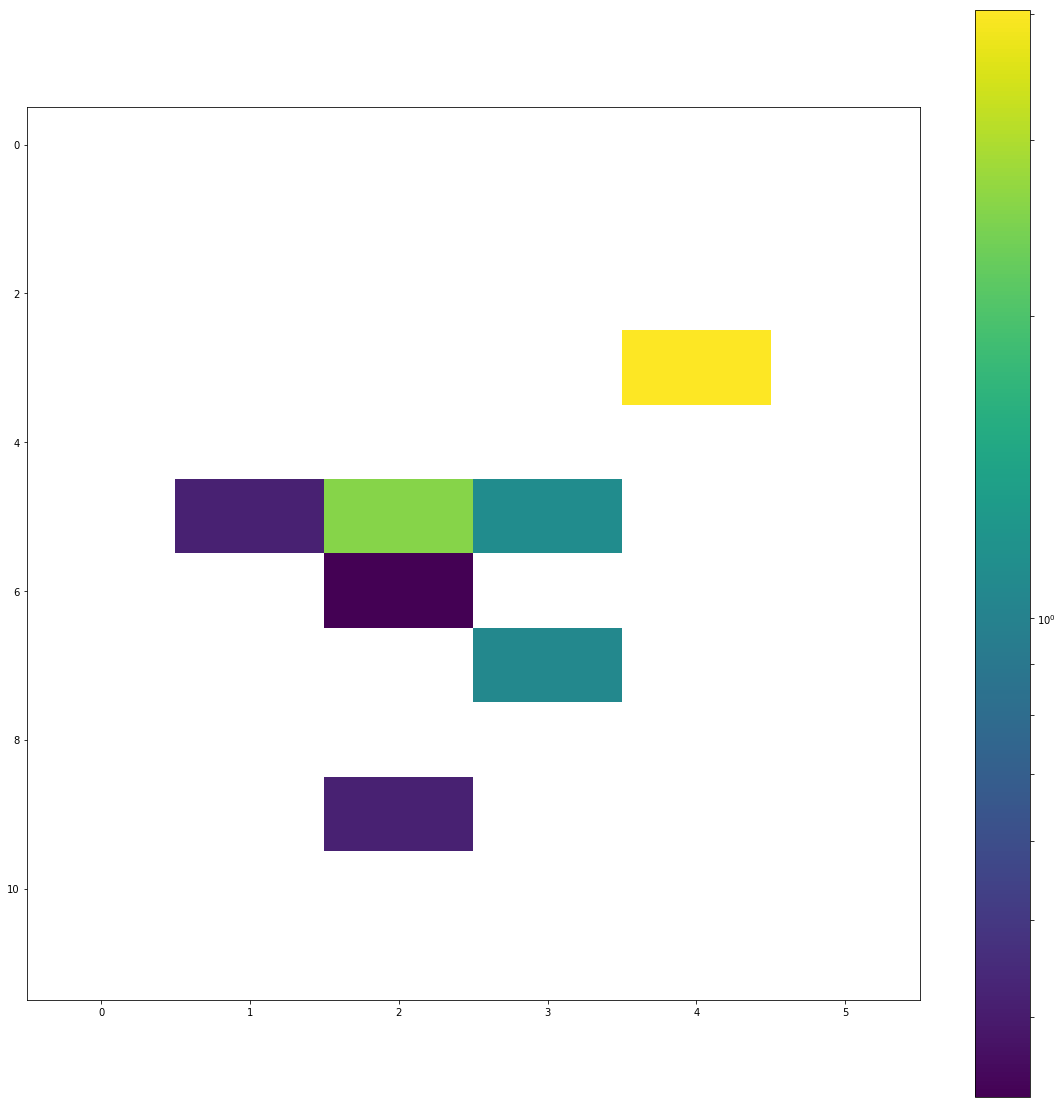

In [18]:
plt.figure(figsize=(20,20))
plt.imshow(third[imageix][:, :, 0], aspect=float(sizes[5])/sizes[4], interpolation='nearest', norm=LogNorm())
plt.colorbar()
# is this rotated?? is it 12*6 or 6*12?

# Mean Images

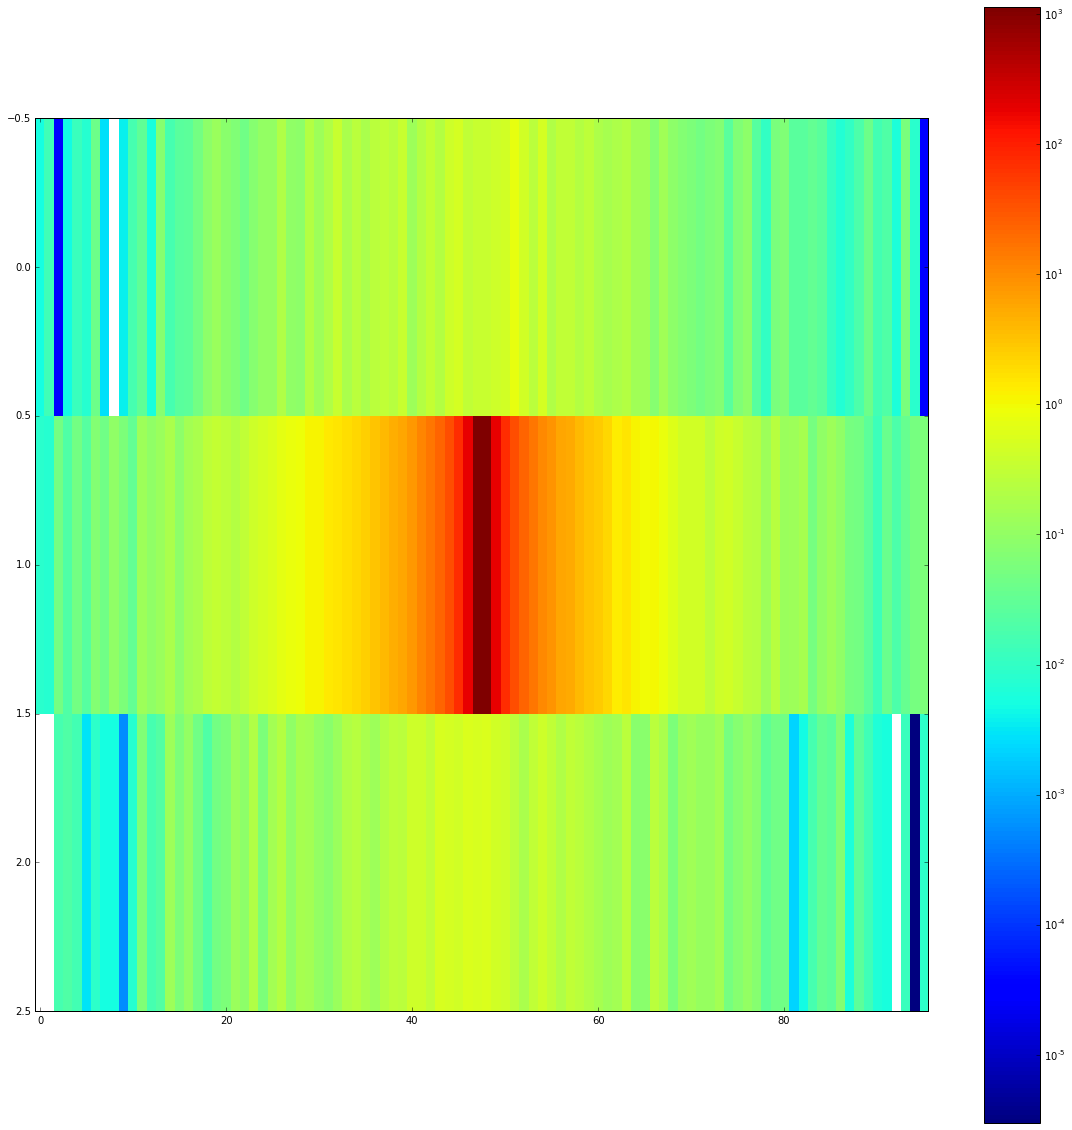

In [71]:
plt.figure(figsize=(20,20))
plt.imshow(first.mean(axis=0), aspect=96./3, interpolation='nearest', norm=LogNorm())
plt.colorbar()

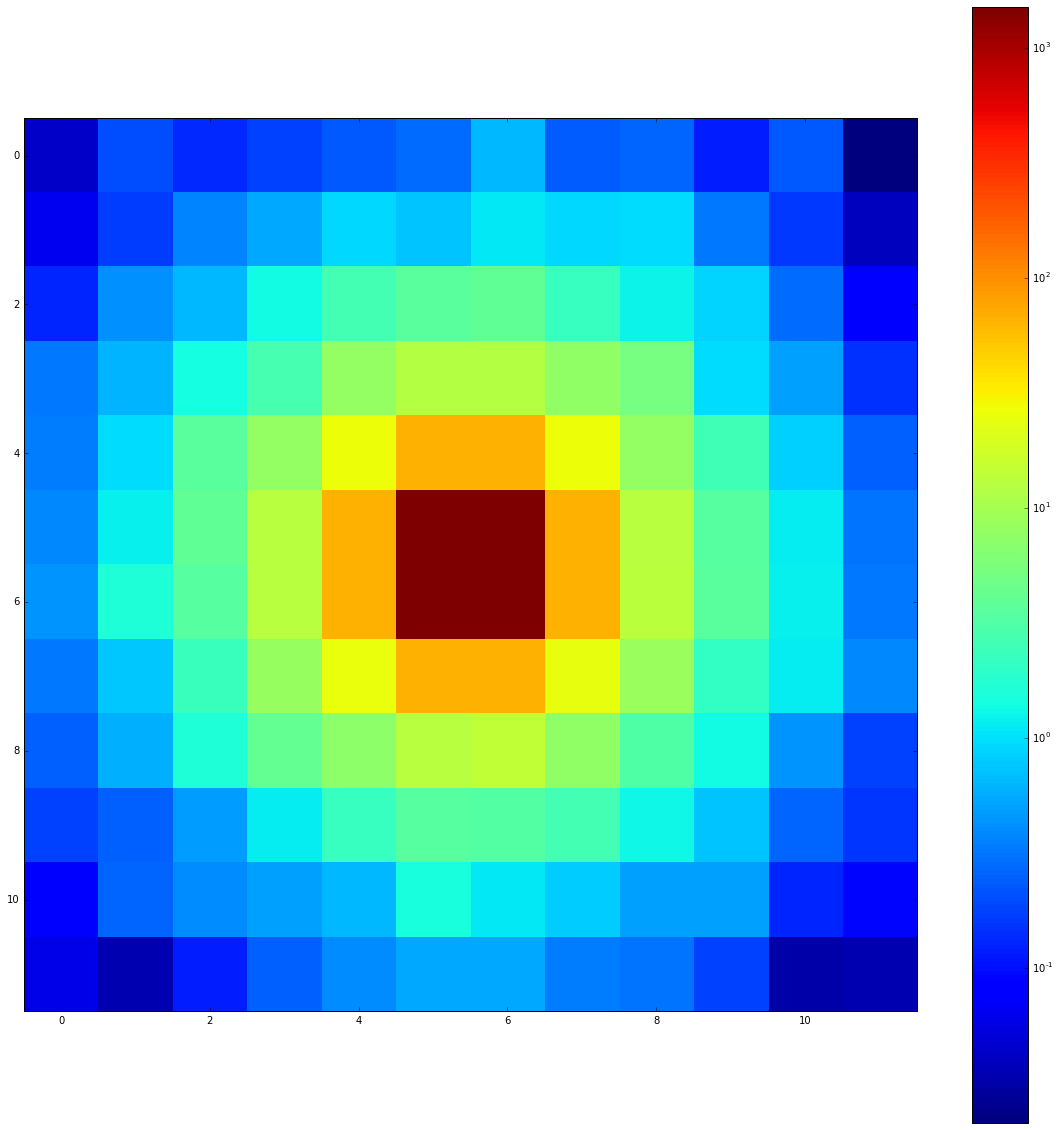

In [72]:
plt.figure(figsize=(20,20))
plt.imshow(second.mean(axis=0), interpolation='nearest', norm=LogNorm())
plt.colorbar()

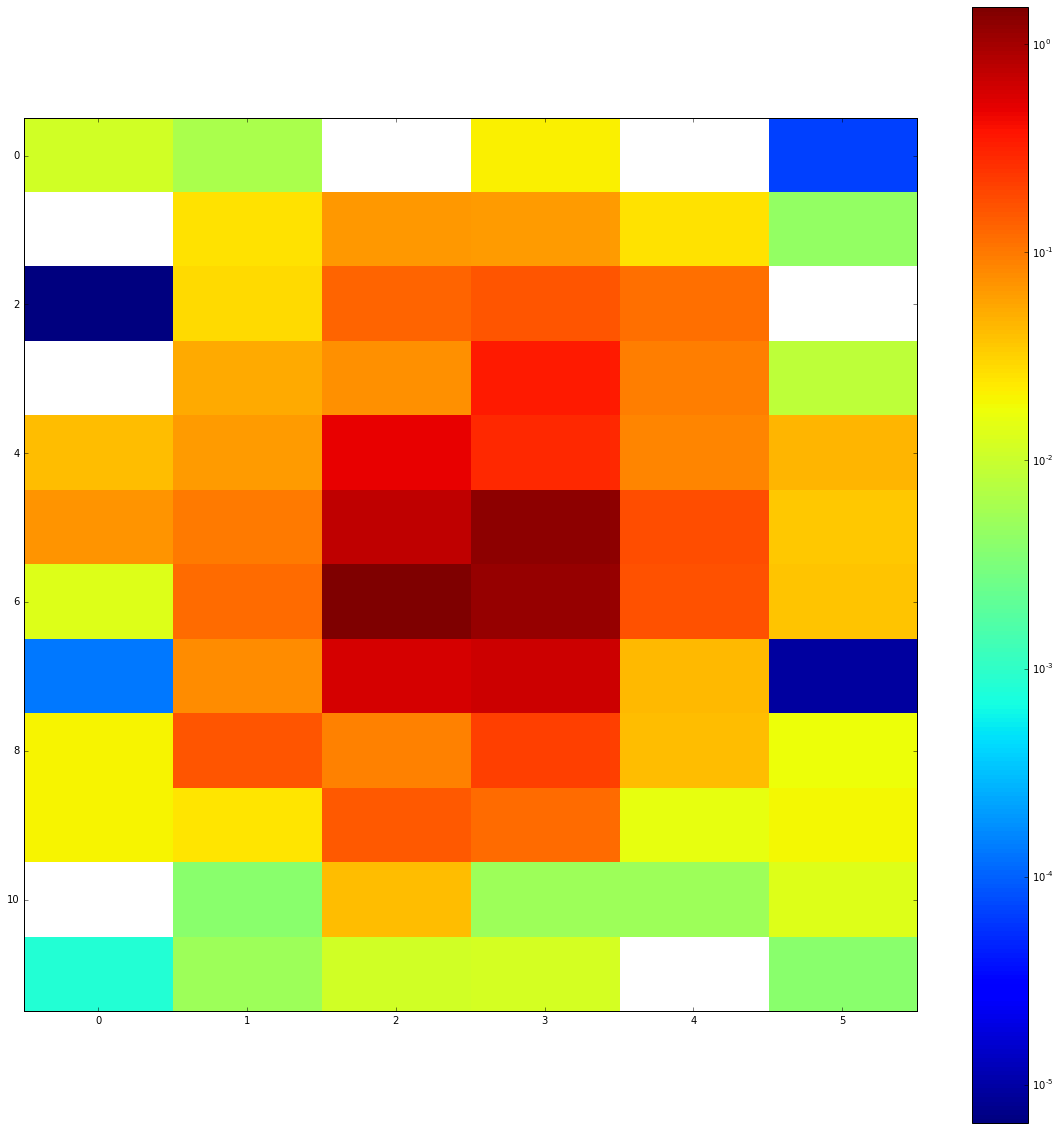

In [73]:
plt.figure(figsize=(20,20))
plt.imshow(third.mean(axis=0), interpolation='nearest', norm=LogNorm(), aspect=1/2.)
plt.colorbar()

pyplot imshow shows equal size pixels. This won't be a problem in the future once we homogenize the pixel sizes across etas, but right now these images are not realistic.

Metrics:
    - depth (categorical? 1, 2, 3?)
    - r^2 (squared transverse distance from particle direction)

r^2 is going to be very easy to calculate once we have a uniform binning scheme across all three calorimeter layers

How should we take into account the depth of each layer? As a separation distance among images?

# Sample info

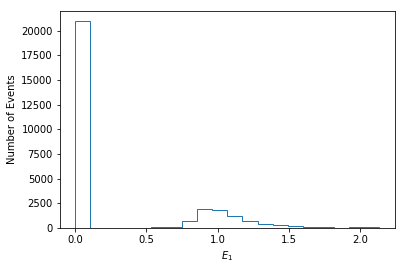

In [56]:
# -- ratio of energy deposited in the first layer to energy deposited in the second layer
_ = plt.hist(np.power(first.ravel(), 0.1), bins=20, histtype='step')
plt.ylabel('Number of Events')
plt.xlabel(r'$E_1$')

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


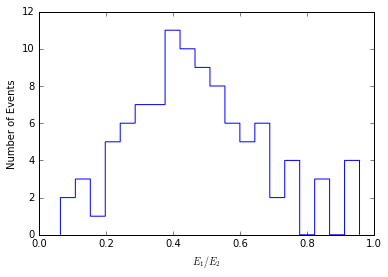

In [74]:
# -- ratio of energy deposited in the first layer to energy deposited in the second layer
fs_ratio = [f.sum()/float(s.sum()) for f,s in zip(first, second)]
_ = plt.hist(np.array(fs_ratio)[np.isfinite(fs_ratio)], bins=20, histtype='step')
plt.ylabel('Number of Events')
plt.xlabel(r'$E_1 / E_2$')

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


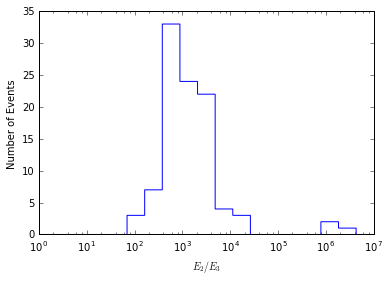

In [75]:
# -- ratio of energy deposited in the second layer to energy deposited in the third layer
st_ratio = [s.sum()/float(t.sum()) for s,t in zip(second, third)]
_ = plt.hist(np.array(st_ratio)[np.isfinite(st_ratio)], bins=np.logspace(0, 7, 20), histtype='step')
plt.xscale('log')
plt.ylabel('Number of Events')
plt.xlabel(r'$E_2 / E_3$')

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


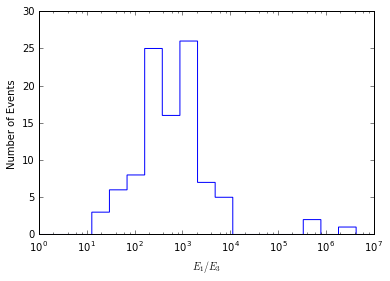

In [76]:
# -- ratio of energy deposited in the first layer to energy deposited in the third layer
ft_ratio = [f.sum()/float(t.sum()) for f,t in zip(first, third)]
_ = plt.hist(np.array(ft_ratio)[np.isfinite(ft_ratio)], bins=np.logspace(0, 7, 20), histtype='step')
plt.xscale('log')
plt.ylabel('Number of Events')
plt.xlabel(r'$E_1 / E_3$')

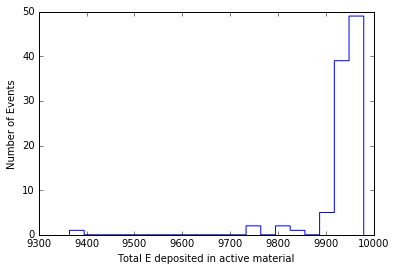

In [77]:
# -- total energy deposited in active material
E = [f.sum() + s.sum() + t.sum() for f, s, t in zip(first, second, third)]
_ = plt.hist(E[1:], bins=20, histtype='step') # the first event is empty
plt.ylabel('Number of Events')
plt.xlabel('Total E deposited in active material')

# Finer Sample

In [78]:
d = pd.read_csv("data/Geant4_10GeVeminus_LaROnly_10k_cells_finer_mod.txt", delimiter=",", header=None, skiprows=1, 
                nrows=10).values

Number of cells per layer: 30,960|120,120|120,60

I'm assuming they are all of uneven sizes, just finer than before.

In [79]:
print 30*960 + 120*120 + 120*60
print d.shape 

50400
(10, 50400)


Why are we missing 2 pixels?

In [80]:
first, second, third = np.split(d, indices_or_sections=[30*960, 30*960 + 120*120], axis=1)

In [81]:
# -- reshape to put them into unravelled, 2D image format
first = first.reshape(-1, 30, 960)
second = second.reshape(-1, 120, 120)
third = third.reshape(-1, 120, 60)

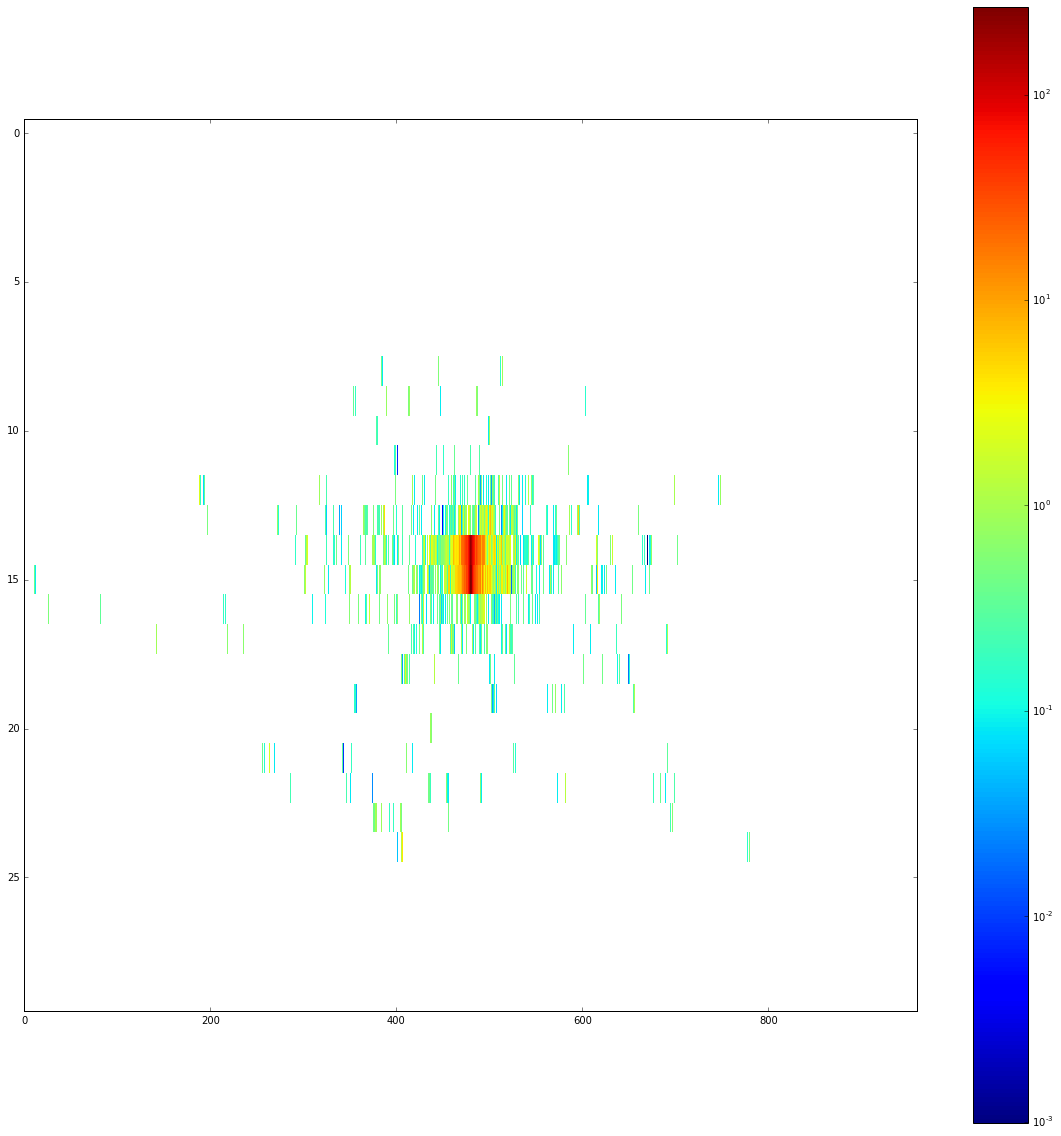

In [82]:
imageix = 1 # first event is still empty
plt.figure(figsize=(20,20))
plt.imshow(first[imageix], aspect=960/30, interpolation='nearest', norm=LogNorm())
plt.colorbar()

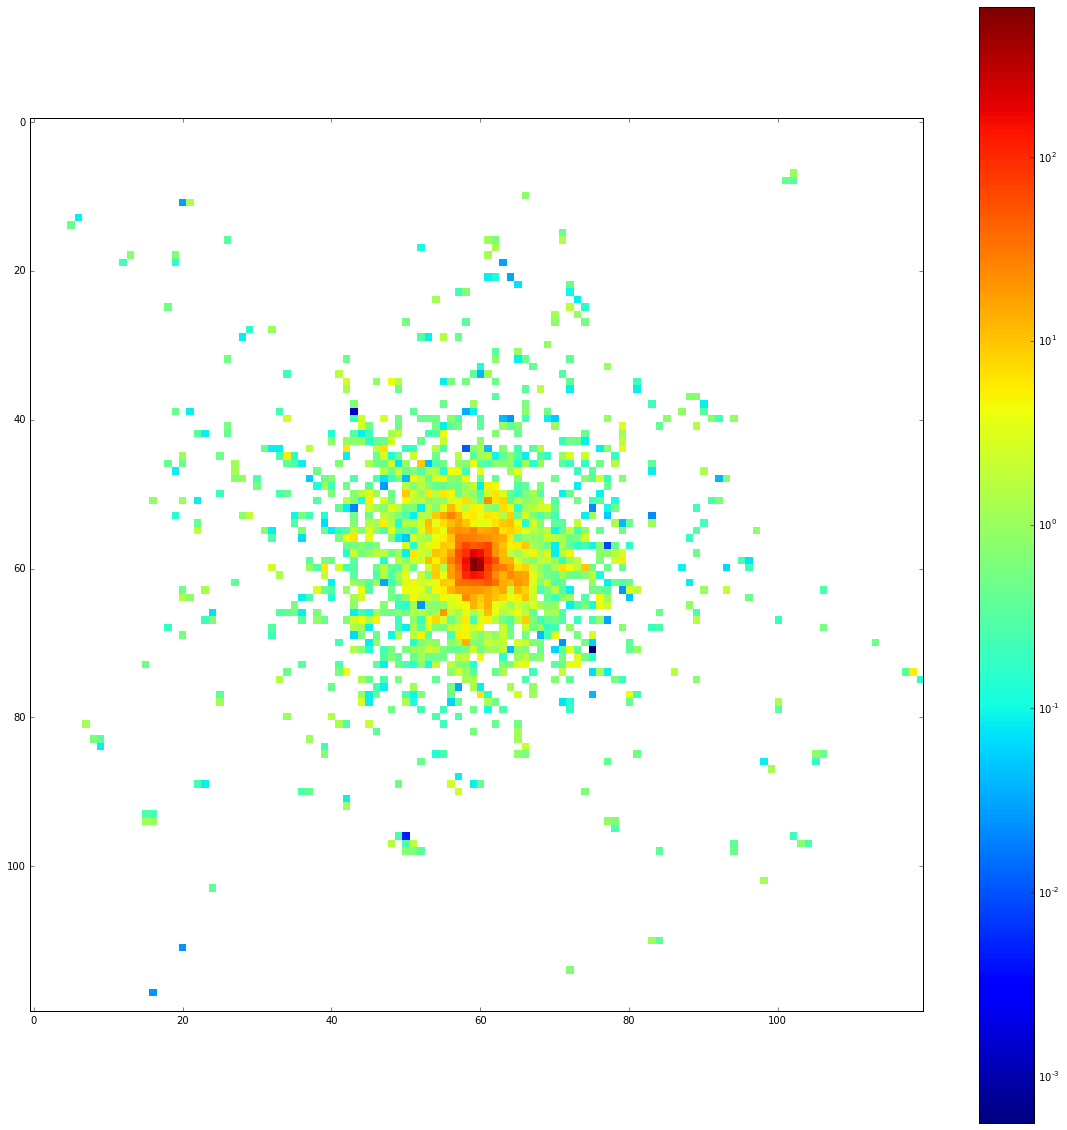

In [83]:
plt.figure(figsize=(20,20))
plt.imshow(second[imageix], interpolation='nearest', norm=LogNorm())
plt.colorbar()

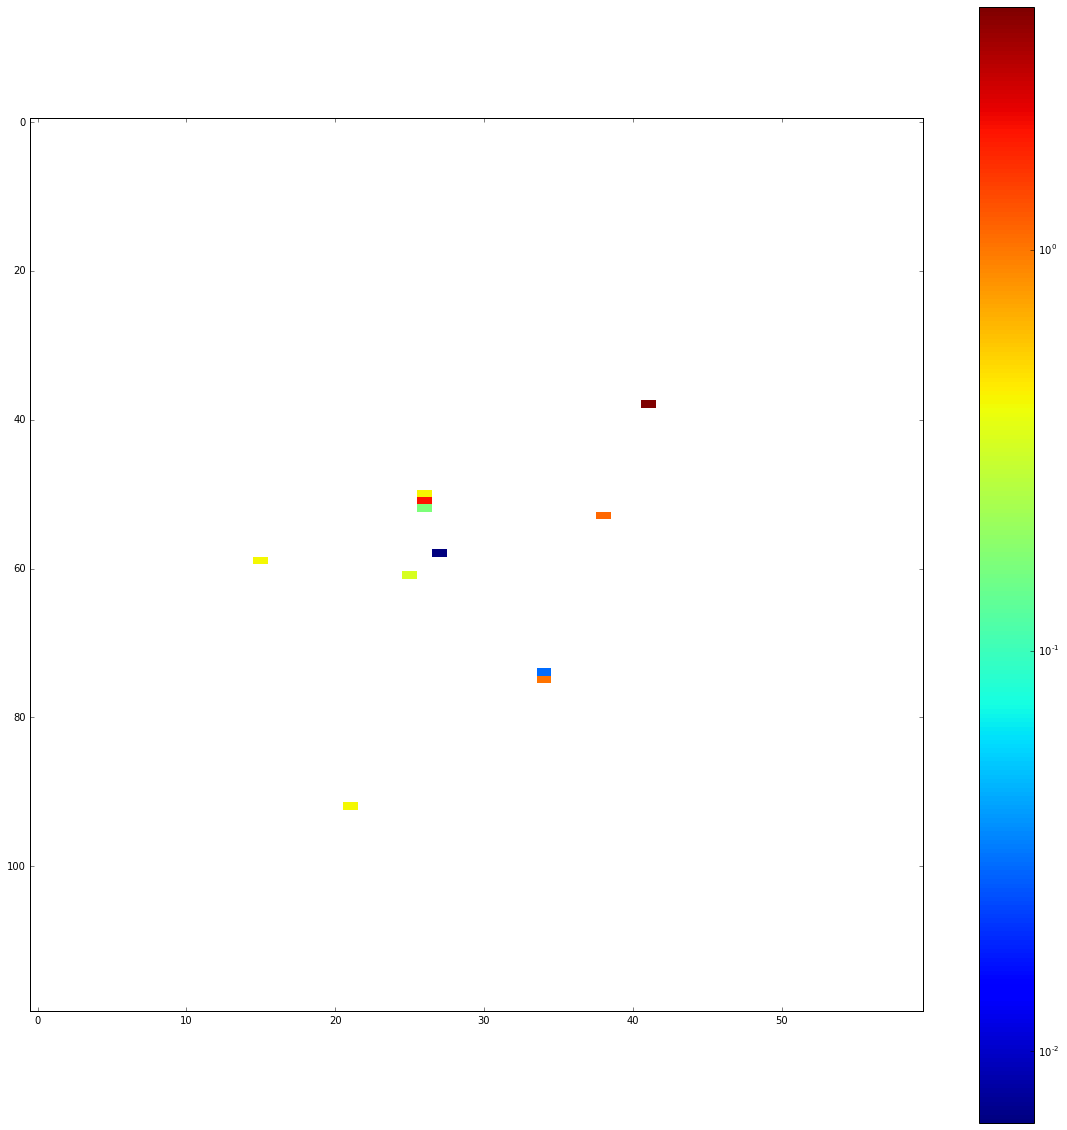

In [84]:
plt.figure(figsize=(20,20))
plt.imshow(third[imageix], aspect=60/120.0, interpolation='nearest', norm=LogNorm())
plt.colorbar()

# Keras Generator

In [38]:
import keras.backend as K
from keras.layers import (Input, Dense, Reshape, Flatten, Embedding, merge,
                          Dropout, BatchNormalization, Activation, Lambda)

from keras.layers.advanced_activations import LeakyReLU

from keras.layers.local import LocallyConnected2D
from keras.layers.convolutional import UpSampling2D, Conv2D, ZeroPadding2D

from keras.models import Model, Sequential

K.set_image_dim_ordering('tf')

In [24]:
latent_size = 500

In [25]:
# this is the z space commonly refered to in GAN papers
latent = Input(shape=(latent_size, ))

In [32]:
loc = Sequential([
    # DCGAN-style project & reshape,
    Dense(5 * 98 * 12, input_dim=latent_size),
    Reshape((5, 98, 12)),

    # block 1: (None, 5, 98, 12) => (None, 5, 98, 8),
    Conv2D(8, 2, 2, border_mode='same', init='he_uniform'),
    LeakyReLU(),
    BatchNormalization(),

    # block 2: (None, 5, 98, 32) => (None, 4, 97, 6),
    #ZeroPadding2D((2, 2)),
    LocallyConnected2D(6, 2, 2, init='he_uniform'),
    LeakyReLU(),
    BatchNormalization(),

    # block 3: (None, 4, 97, 6) => (None, 3, 96, 1),
    LocallyConnected2D(1, 2, 2, bias=False, init='glorot_normal'),
    Activation('relu')
])

In [33]:
loc.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_2 (Dense)                  (None, 5880)          2945880     dense_input_2[0][0]              
____________________________________________________________________________________________________
reshape_2 (Reshape)              (None, 5, 98, 12)     0           dense_2[0][0]                    
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 5, 98, 8)      392         reshape_2[0][0]                  
____________________________________________________________________________________________________
leakyrelu_3 (LeakyReLU)          (None, 5, 98, 8)      0           convolution2d_2[0][0]            
___________________________________________________________________________________________

In [34]:
z = np.random.normal(0, 1, (10, 500))

In [35]:
output = loc.predict(z)

In [36]:
output.shape

(10, 3, 96, 1)

In [37]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
"""
file: ops.py
description: ancillary ops for [arXiv/1701.05927]
author: Luke de Oliveira (lukedeoliveira@lbl.gov)
"""

import keras.backend as K
from keras.engine import InputSpec, Layer
from keras import initializations, regularizers, constraints, activations


def minibatch_discriminator(x):
    """ Computes minibatch discrimination features from input tensor x"""
    diffs = K.expand_dims(x, 3) - \
        K.expand_dims(K.permute_dimensions(x, [1, 2, 0]), 0)
    l1_norm = K.sum(K.abs(diffs), axis=2)
    return K.sum(K.exp(-l1_norm), axis=2)


def minibatch_output_shape(input_shape):
    """ Computes output shape for a minibatch discrimination layer"""
    shape = list(input_shape)
    assert len(shape) == 3  # only valid for 3D tensors
    return tuple(shape[:2])


class Dense3D(Layer):

    """
    A 3D, trainable, dense tensor product layer
    """

    def __init__(self, first_dim, last_dim, init='glorot_uniform',
                 activation=None, weights=None,
                 W_regularizer=None, b_regularizer=None, activity_regularizer=None,
                 W_constraint=None, b_constraint=None,
                 bias=True, input_dim=None, **kwargs):

        self.init = initializations.get(init)
        self.activation = activations.get(activation)

        self.input_dim = input_dim
        self.first_dim = first_dim
        self.last_dim = last_dim

        self.W_regularizer = regularizers.get(W_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)
        self.activity_regularizer = regularizers.get(activity_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.bias = bias
        self.initial_weights = weights
        self.input_spec = [InputSpec(ndim=2)]

        if self.input_dim:
            kwargs['input_shape'] = (self.input_dim,)
        super(Dense3D, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 2
        input_dim = input_shape[1]
        self.input_spec = [InputSpec(dtype=K.floatx(),
                                     shape=(None, input_dim))]

        self.W = self.add_weight(
            (self.first_dim, input_dim, self.last_dim),
            initializer=self.init,
            name='{}_W'.format(self.name),
            regularizer=self.W_regularizer,
            constraint=self.W_constraint
        )
        if self.bias:
            self.b = self.add_weight(
                (self.first_dim, self.last_dim),
                initializer='zero',
                name='{}_b'.format(self.name),
                regularizer=self.b_regularizer,
                constraint=self.b_constraint
            )
        else:
            self.b = None

        if self.initial_weights is not None:
            self.set_weights(self.initial_weights)
            del self.initial_weights
        self.built = True

    def call(self, x, mask=None):
        out = K.reshape(K.dot(x, self.W), (-1, self.first_dim, self.last_dim))
        if self.bias:
            out += self.b
        return self.activation(out)

    def get_output_shape_for(self, input_shape):
        assert input_shape and len(input_shape) == 2
        return (input_shape[0], self.first_dim, self.last_dim)

    def get_config(self):
        config = {
            'first_dim': self.first_dim,
            'last_dim': self.last_dim,
            'init': self.init.__name__,
            'activation': self.activation.__name__,
            'W_regularizer': self.W_regularizer.get_config() if self.W_regularizer else None,
            'b_regularizer': self.b_regularizer.get_config() if self.b_regularizer else None,
            'activity_regularizer': self.activity_regularizer.get_config() if self.activity_regularizer else None,
            'W_constraint': self.W_constraint.get_config() if self.W_constraint else None,
            'b_constraint': self.b_constraint.get_config() if self.b_constraint else None,
            'bias': self.bias,
            'input_dim': self.input_dim
        }
        base_config = super(Dense3D, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

In [43]:
image = Input(shape=(3, 96, 1))

# block 1: normal 2x2 conv,
# *NO* batchnorm (recommendation from [arXiv/1511.06434])
x = Conv2D(32, 2, 2, border_mode='same')(image)
x = LeakyReLU()(x)
x = Dropout(0.2)(x)

# block 2: 'same' bordered 3x3 locally connected block with batchnorm and
# 2x2 subsampling
x = ZeroPadding2D((1, 1))(x)
x = LocallyConnected2D(8, 3, 3, border_mode='valid', subsample=(1, 2))(x)
x = LeakyReLU()(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

# block 2: 'same' bordered 5x5 locally connected block with batchnorm
x = ZeroPadding2D((1, 1))(x)
x = LocallyConnected2D(8, 2, 2, border_mode='valid')(x)
x = LeakyReLU()(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

# block 3: 2x2 locally connected block with batchnorm and
# 1x2 subsampling
x = ZeroPadding2D((1, 1))(x)
x = LocallyConnected2D(8, 2, 2, border_mode='valid', subsample=(1, 2))(x)
x = LeakyReLU()(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

#x = AveragePooling2D((2, 2))(x)
h = Flatten()(x)

# nb of features to obtain
nb_features = 20

# dim of kernel space
vspace_dim = 10

# creates the kernel space for the minibatch discrimination
K_x = Dense3D(nb_features, vspace_dim)(h)

minibatch_featurizer = Lambda(minibatch_discriminator,
                              output_shape=minibatch_output_shape)

# concat the minibatch features with the normal ones
features = merge([
    minibatch_featurizer(K_x),
    h
], mode='concat')

# fake output tracks binary fake / not-fake, and the auxiliary requires
# reconstruction of latent features, in this case, labels
fake = Dense(1, activation='sigmoid', name='generation')(features)
#aux = Dense(1, activation='sigmoid', name='auxiliary')(features)

discriminator = Model(image, fake)

In [44]:
discriminator.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_4 (InputLayer)             (None, 3, 96, 1)      0                                            
____________________________________________________________________________________________________
convolution2d_5 (Convolution2D)  (None, 3, 96, 32)     160         input_4[0][0]                    
____________________________________________________________________________________________________
leakyrelu_13 (LeakyReLU)         (None, 3, 96, 32)     0           convolution2d_5[0][0]            
____________________________________________________________________________________________________
dropout_9 (Dropout)              (None, 3, 96, 32)     0           leakyrelu_13[0][0]               
___________________________________________________________________________________________

In [45]:
discriminator.predict(first)

array([[ 0.49795443],
       [ 0.41753158],
       [ 0.40102229],
       [ 0.33231941],
       [ 0.41064116],
       [ 0.40933001],
       [ 0.35863325],
       [ 0.34088859],
       [ 0.38230407],
       [ 0.4362205 ],
       [ 0.38313439],
       [ 0.40432215],
       [ 0.39243612],
       [ 0.37645024],
       [ 0.38307112],
       [ 0.39805841],
       [ 0.43294594],
       [ 0.46138364],
       [ 0.42703134],
       [ 0.30125418],
       [ 0.37281805],
       [ 0.47895589],
       [ 0.45455831],
       [ 0.3545672 ],
       [ 0.32764086],
       [ 0.36403099],
       [ 0.42461374],
       [ 0.38734782],
       [ 0.44171828],
       [ 0.396415  ],
       [ 0.41205743],
       [ 0.41453999],
       [ 0.37679911],
       [ 0.41939861],
       [ 0.51995987],
       [ 0.42305633],
       [ 0.43959498],
       [ 0.33797166],
       [ 0.33180687],
       [ 0.358091  ],
       [ 0.39233416],
       [ 0.34021044],
       [ 0.40011036],
       [ 0.46006107],
       [ 0.38514164],
       [ 0